# EDA(Exploratory Data Analysis)
- 탐색적 데이터 분석
- 데이터를 분석하고 결과를 도출하는 과정에 있어서 지속적으로 해당 데이터에 대한 탐색과 이해를 기본적으로 가져야한다는 의미

## 데이터 종류
- 수치형 데이터
    - 연속형
        - 일정범위 안에서 어떤값도 취할수 있는 실수형 데이터(ex. 온도, 키, 운임료)
    - 이산형
        - 횟수 같은 정수형 데이터(ex. 사건에 대한 발생 횟수, 부모 자식수)
- 범주형 데이터
    - 가능한 범주안의 값만 취할수 있는 데이터
    - 성별: 남/여 (명목형)
    - 전공: 경영학/교육학/인문학 (명목형)
    - 장르: 스릴러/공포/드라마 (명목형)
    - 영화평점: 1/2/3/4/5 (순서형)
    - 직급: 사원/대리/과장/차장/부장 (순서형)

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
DATA_PATH = "/content/drive/MyDrive/Colab Notebooks/Data/"

- Features, 독립변수, 설명변수
    - 학습데이터의 특성
- class, label, target, 종속변수
    - 정답데이터

In [ ]:
df = pd.read_csv(f"{DATA_PATH}titanic.csv")
df.head()

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 수치형 데이터 분석하기

- 총합

In [ ]:
df["fare"].sum()

43550.4869

- 평균

In [ ]:
df["fare"].mean()

33.29547928134557

- 중앙값

In [ ]:
df["fare"].median()

14.4542

- 분산, 표준편차

In [ ]:
df["fare"].var(), df["fare"].std()

(2678.959737892891, 51.75866823917411)

- 분위수 계산하기

In [ ]:
df["fare"].quantile([0.25,0.5,0.75])

0.25     7.8958
0.50    14.4542
0.75    31.2750
Name: fare, dtype: float64

- 왜도(Skewness)
    - 데이터 분포의 비대칭도를 나타내는 통계랑
    - 분포가 오른쪽으로 치우쳐져 있고, 왼쪽으로 긴꼬리를 가진 경우 왜도는 음수
    - 분포가 왼쪽으로 치우쳐져 있고, 오른쪽으로 가진 경우 왜도는 양수
    - 정규분포와 같이 좌우 대칭인 경우 왜도는 0에 가까워짐

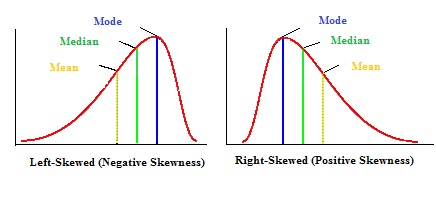

In [ ]:
df["fare"].skew()

4.367709134122922

- 상관계수 `corr()`
    - 칼 피어슨(Karl Pearson)이 개발한 상관계수
    - 두개의 수치형 변수의 변화가 연관되는 정도
    - +1 ~ -1 사이의 값을 가짐
    - +1에 가까울수록 양의 상관관계
    - -1에 가까울수록 음의 상관관계
    - 0에 가까울수록 상관관계 X

In [ ]:
cols = ["survived","age","sibsp","parch","fare"]
df[cols].corr()

,survived,age,sibsp,parch,fare
survived,1.000000,-0.053695,0.002370,0.108919,0.233622
age,-0.053695,1.000000,-0.243699,-0.150917,0.178740
sibsp,0.002370,-0.243699,1.000000,0.373587,0.160238
parch,0.108919,-0.150917,0.373587,1.000000,0.221539
fare,0.233622,0.178740,0.160238,0.221539,1.000000


# 범주형 데이터 분석하기

- 고유값 개수보기

In [ ]:
df["embarked"].nunique() # 원핫인코딩

3

- 고유값 확인

In [ ]:
# 유니크한 값 확인
df["embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

- 최빈값

In [ ]:
df["embarked"].mode()

0    S
dtype: object

- 범주별 개수보기

In [ ]:
df["embarked"].value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [ ]:
# 비율 확인
df["embarked"].value_counts(normalize=True) 

S    0.699311
C    0.206580
Q    0.094109
Name: embarked, dtype: float64

In [ ]:
# 객실의 유니크한 개수
df["cabin"].nunique()

186

In [ ]:
df["cabin"].value_counts().head(10)

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
F2                 4
B96 B98            4
C78                4
F4                 4
D                  4
Name: cabin, dtype: int64

- 두 범주형 간의 관계 확인

In [ ]:
pd.crosstab(df["gender"],df["survived"],margins = True)

survived,0,1,All
gender,,,
female,81,385,466
male,734,109,843
All,815,494,1309


In [ ]:
pd.crosstab(df["gender"],df["survived"],margins = True, normalize = "index")

survived,0,1
gender,,
female,0.173820,0.826180
male,0.870700,0.129300
All,0.622613,0.377387


In [ ]:
pd.crosstab(df["pclass"],df["embarked"],margins=True, normalize="index")

embarked,C,Q,S
pclass,,,
1,0.439252,0.009346,0.551402
2,0.101083,0.025271,0.873646
3,0.142454,0.159379,0.698166
All,0.206580,0.094109,0.699311
